# 241119_4FEA_LXe

In [1]:
######################
# import pacakge
######################
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#get_ipython().run_line_magic('matplotlib', 'ipympl')
#%matplotlib widget
import os
import FEA_analysis
import numpy as np
from datetime import timedelta
from datetime import date
from scipy.signal import find_peaks
from statistics import mean

import matplotlib as mpl

dir_name = "/home/caio/remote/MsC/fig/"

mpl.rcParams["savefig.directory"] = dir_name

print(mpl.rcParams["savefig.directory"])

/home/caio/remote/MsC/fig/


## Xe volume

In [2]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON', 'RAMPINGUP', 'RAMPINGDOWN', 'VSET', 'ISET']
FEA_test_dir = '241119_4FEA_LXe' 
FEA_data = 'beforeLXe'
OS = 'linux'

all_df_caen1, all_df_caen2, df_ctc = FEA_analysis.import_caen_data(FEA_test_dir, FEA_data, cols, OS)

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

In [3]:
df_ctc

,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,-0.022035
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,-0.022265
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,-0.021902
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,-0.021474
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,-0.022124
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,-0.022372
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,-0.022205
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,-0.022310
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,-0.022332


In [4]:
for i in range(0, len(df_ctc['AIO4'])):
        if df_ctc.loc[i, 'AIO4'] < 0:
              df_ctc.loc[i,'AIO4'] = 0

In [5]:
baselineForPressureGauge = df_ctc['AIO4'].loc[0:100]
print(baselineForPressureGauge)
print(np.mean(baselineForPressureGauge))

df_ctc['AIO4'] -= np.mean(baselineForPressureGauge)
df_ctc

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
Name: AIO4, Length: 101, dtype: float64
0.0


,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,0.0
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,0.0
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,0.0
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,0.0
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,0.0
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,0.0
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,0.0
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,0.0
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,0.0


In [6]:
y = df_ctc[df_ctc['AIO4'] > 0]
yy = y[y['AIO4'] < 1.01]
yyy = yy['AIO4']/30
x = yy['timestamp']
xx = []
for el in x:
    xx.append(datetime.strptime(el, '%y/%m/%d-%H:%M:%S'))



In [7]:
np.sum(yyy)/2.97

1.8421417669977551

In [8]:
print(xx[-1]-xx[0])
print(xx)

0:07:12
[datetime.datetime(2024, 11, 25, 16, 40, 33), datetime.datetime(2024, 11, 25, 16, 40, 35), datetime.datetime(2024, 11, 25, 16, 40, 39), datetime.datetime(2024, 11, 25, 16, 41, 23), datetime.datetime(2024, 11, 25, 16, 41, 25), datetime.datetime(2024, 11, 25, 16, 41, 27), datetime.datetime(2024, 11, 25, 16, 41, 29), datetime.datetime(2024, 11, 25, 16, 41, 31), datetime.datetime(2024, 11, 25, 16, 41, 33), datetime.datetime(2024, 11, 25, 16, 41, 35), datetime.datetime(2024, 11, 25, 16, 41, 37), datetime.datetime(2024, 11, 25, 16, 41, 39), datetime.datetime(2024, 11, 25, 16, 41, 41), datetime.datetime(2024, 11, 25, 16, 41, 43), datetime.datetime(2024, 11, 25, 16, 41, 45), datetime.datetime(2024, 11, 25, 16, 41, 47), datetime.datetime(2024, 11, 25, 16, 41, 49), datetime.datetime(2024, 11, 25, 16, 41, 51), datetime.datetime(2024, 11, 25, 16, 41, 53), datetime.datetime(2024, 11, 25, 16, 41, 55), datetime.datetime(2024, 11, 25, 16, 41, 57), datetime.datetime(2024, 11, 25, 16, 41, 59), d

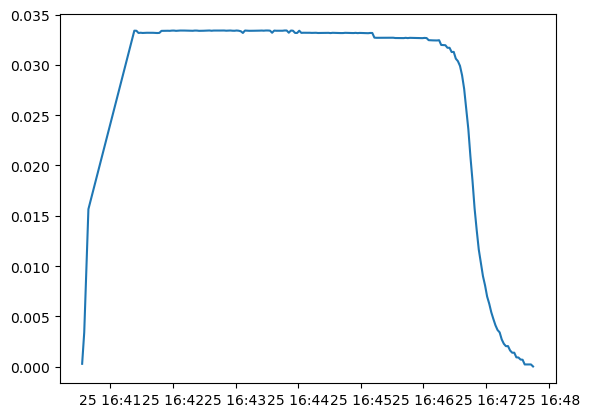

In [9]:
plt.plot(xx,yyy)

In [10]:
df_ctc

,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
0,24/11/19-09:46:42,23.04874,23.05010,23.18091,23.11021,3.839076,-0.102004,-276.0845,0.0
1,24/11/19-09:46:44,23.04876,23.04994,23.18088,23.11021,3.839038,-0.101999,-276.0867,0.0
2,24/11/19-09:46:46,23.04887,23.04969,23.18090,23.11017,3.838951,-0.102004,-276.0870,0.0
3,24/11/19-09:46:48,23.04891,23.04962,23.18113,23.11024,3.839021,-0.102002,-276.0894,0.0
4,24/11/19-09:46:50,23.04859,23.04979,23.18123,23.11001,3.839069,-0.102003,-276.0875,0.0
...,...,...,...,...,...,...,...,...,...
305312,24/11/26-11:34:51,-96.18031,-88.13098,-101.52160,-101.83980,0.007635,0.004916,-112.3718,0.0
305313,24/11/26-11:34:53,-96.18089,-88.13183,-101.52150,-101.84020,0.007635,0.004910,-112.6809,0.0
305314,24/11/26-11:34:55,-96.18134,-88.13230,-101.52180,-101.84030,0.007636,0.004911,-112.3562,0.0
305315,24/11/26-11:34:57,-96.18108,-88.13271,-101.52220,-101.84080,0.007635,0.004914,-112.6818,0.0


In [11]:
df_pressure = df_ctc.copy()

#df_pressure = df_pressure[df_pressure['timestamp'] == ['24/11/30-12:30:01','24/11/31-12:30:01']]

df_pressure = df_pressure[df_pressure['timestamp'] > '24/11/25-17:30:03']
df_pressure = df_pressure[df_pressure['timestamp'] < '24/11/26-02:30:03']  
#df_pressure['AIO2'] = df_pressure['AIO2'] + (0.1 - min(df_pressure['AIO2']))

df_pressure

,timestamp,In1,In2,In3,In4,AIO1,AIO2,AIO3,AIO4
272799,24/11/25-17:30:04,-36.49449,-17.76931,-50.15914,-43.30280,0.007517,0.194907,-106.3208,0.0
272800,24/11/25-17:30:06,-36.52668,-17.80284,-50.19044,-43.31263,0.007534,0.194917,-106.1548,0.0
272801,24/11/25-17:30:08,-36.55694,-17.83504,-50.22026,-43.32270,0.007541,0.194919,-106.1846,0.0
272802,24/11/25-17:30:10,-36.58701,-17.86668,-50.25029,-43.33283,0.007540,0.194919,-106.0014,0.0
272803,24/11/25-17:30:12,-36.61760,-17.89874,-50.27940,-43.34326,0.007553,0.194921,-106.4817,0.0
...,...,...,...,...,...,...,...,...,...
288979,24/11/26-02:29:54,-93.03652,-85.52388,-97.79156,-98.23844,0.007659,0.027946,-107.7482,0.0
288980,24/11/26-02:29:56,-93.03643,-85.52368,-97.79169,-98.23816,0.007663,0.027948,-108.2008,0.0
288981,24/11/26-02:29:58,-93.03612,-85.52365,-97.79136,-98.23856,0.007658,0.027947,-107.5884,0.0
288982,24/11/26-02:30:00,-93.03604,-85.52398,-97.79216,-98.23847,0.007649,0.027951,-107.8800,0.0


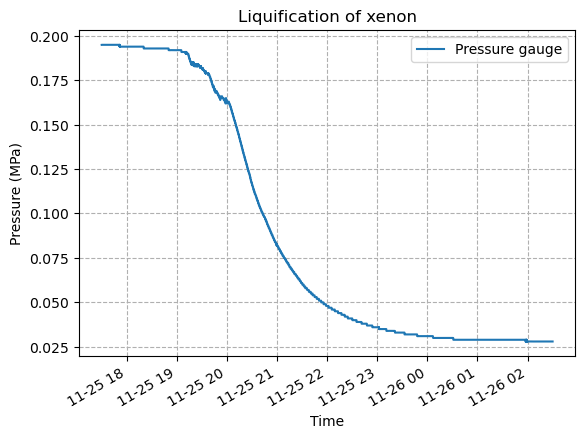

In [12]:
timestamp = df_pressure['timestamp']
datetime_list = []
for d in timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

y = df_pressure['AIO2'].tolist()                                
x = datetime_list

plt.grid(ls='--')

plt.plot(x,y, label='Pressure gauge')
plt.gcf().autofmt_xdate()

plt.xlabel('Time')
plt.ylabel('Pressure (MPa)')
plt.title('Liquification of xenon')
plt.legend()

plt.savefig(f'{dir_name}pressure', dpi=500)
plt.show()

gyvyiviy

## Plots

In [13]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON', 'RAMPINGUP', 'RAMPINGDOWN', 'VSET', 'ISET']
FEA_test_dir = '241119_4FEA_LXe' 
FEA_data = 'afterLXe'
OS = 'linux'

all_df_caen1, all_df_caen2, ctc_100 = FEA_analysis.import_caen_data(FEA_test_dir, FEA_data, cols, OS)

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

In [14]:
from FEA_analysis import total_charge

# time period to calculate the baseline
t_start = '24/11/26-12:30:01'
t_end = '24/11/26-12:40:00'

today = datetime.today()

result_caen1 = [total_charge(all_df_caen1[0], t_start, t_end), total_charge(all_df_caen1[1], t_start, t_end), total_charge(all_df_caen1[2], t_start, t_end), total_charge(all_df_caen1[3], t_start, t_end)]
result_caen2 = [total_charge(all_df_caen2[0], t_start, t_end), total_charge(all_df_caen2[1], t_start, t_end), total_charge(all_df_caen2[2], t_start, t_end), total_charge(all_df_caen2[3], t_start, t_end)]


charge_1 = [result_caen1[i][0] for i in range(0, len(all_df_caen1))]
charge_2 = [result_caen2[i][0] for i in range(0, len(all_df_caen2))]

charge = {'int_C1HV0':charge_1[0], 'int_C1HV1':charge_1[1], 'int_C1HV2':charge_1[2], 'int_C1HV3':charge_1[3], 'int_C2HV0':charge_2[0], 'int_C2HV1':charge_2[1], 'int_C2HV2':charge_2[2], 'int_C2HV3':charge_2[3]}

mean_current_1 = [result_caen1[i][1] for i in range(0, len(all_df_caen1))]
mean_current_2 = [result_caen2[i][1] for i in range(0, len(all_df_caen2))]

corr_all_caen1 = [result_caen1[i][2] for i in range(0, len(all_df_caen1))]
corr_all_caen2 = [result_caen2[i][2] for i in range(0, len(all_df_caen2))]

current used to baseline correction is 0.004033872340425532
current used to baseline correction is 0.0030274893617021274
current used to baseline correction is -0.004261234042553192
current used to baseline correction is 0.013292978723404255
current used to baseline correction is 0.0007314042553191489
current used to baseline correction is 0.003979914893617021
current used to baseline correction is -0.002569148936170213
current used to baseline correction is 0.003473617021276596


In [15]:
df_F0003 = corr_all_caen1[3]
df_F0005 = corr_all_caen1[2]
df_F0004_neg = corr_all_caen2[3]
df_F0004_pos = corr_all_caen2[0]
df_F0007 = corr_all_caen2[2]
FEA = ['FEA0003', 'FEA0004', 'FEA0005', 'FEA0007']

df_F0003.loc[df_F0003['ch']==3, 'FEA'] = FEA[0]
df_F0004_neg.loc[df_F0004_neg['ch']==3, 'FEA'] = FEA[1]
df_F0004_pos.loc[df_F0004_pos['ch']==0, 'FEA'] = FEA[1]
df_F0005.loc[df_F0005['ch']==2, 'FEA'] = FEA[2]
df_F0007.loc[df_F0007['ch']==2, 'FEA'] = FEA[3]

df_F0003 = df_F0003.reset_index(drop=True)
df_F0004_neg = df_F0004_neg.reset_index(drop=True)
df_F0004_pos = df_F0004_pos.reset_index(drop=True)
df_F0005 = df_F0005.reset_index(drop=True)
df_F0007 = df_F0007.reset_index(drop=True)


### FEA 0003

#### peak_find() to reject current peaks from charge 

0.001139439594070602


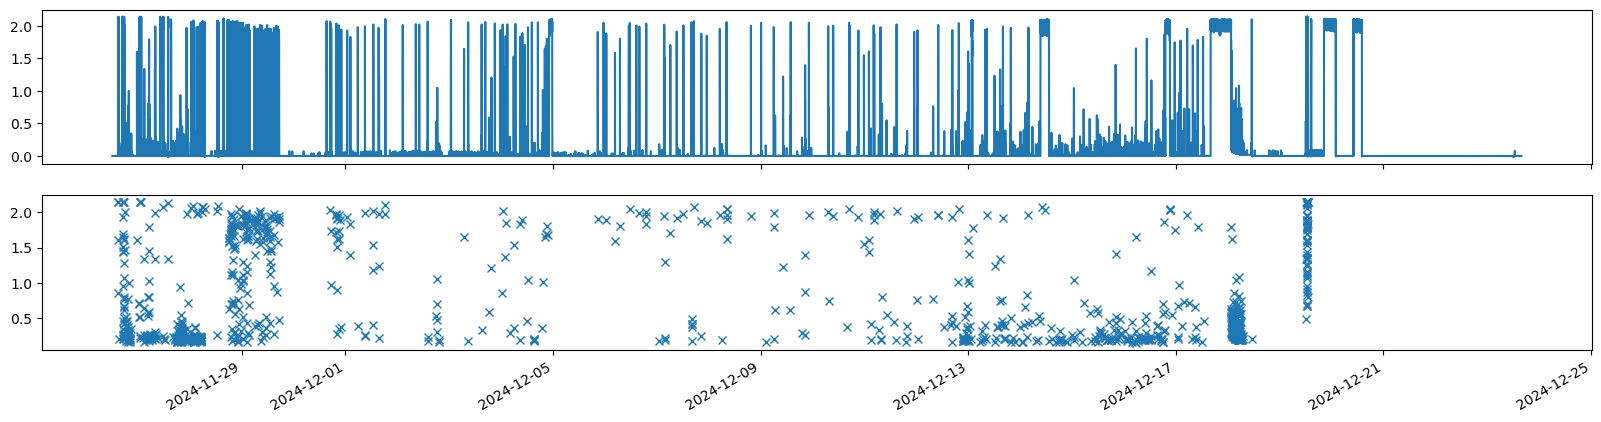

In [16]:
df = df_F0003.copy()

x = df['IMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x, threshold=[0.15,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

0.0037535748974019266


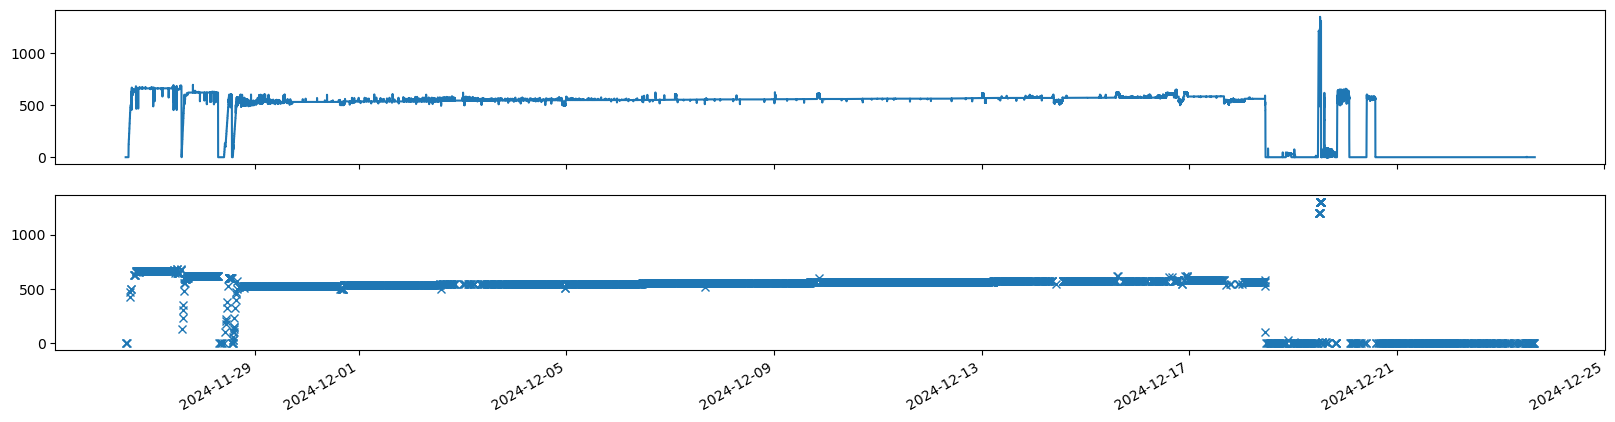

In [17]:
df = df_F0003.copy()

x = df['VMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x,threshold=[None,0.14])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

#### cuts for charge

In [18]:
# cuts

df = df_F0003.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0003 = FEA_analysis.cumulated_charge(df)

cum_df_F0003

                timestamp      IMON  VMON   VSET  ISET  caen  ch RUP RDW  \
0       24/11/26-12:14:05 -0.000003  2.60    0.0   2.1     1   3  no  no   
1       24/11/26-12:14:07 -0.000013  2.60    0.0   2.1     1   3  no  no   
2       24/11/26-12:14:10 -0.000013  2.60    0.0   2.1     1   3  no  no   
3       24/11/26-12:14:12 -0.000013  2.60    0.0   2.1     1   3  no  no   
4       24/11/26-12:14:15 -0.000013  2.60    0.0   2.1     1   3  no  no   
...                   ...       ...   ...    ...   ...   ...  ..  ..  ..   
927644  24/12/23-15:46:31 -0.000153  2.65  600.0   2.1     1   3  no  no   
927645  24/12/23-15:46:34 -0.000153  2.65  600.0   2.1     1   3  no  no   
927646  24/12/23-15:46:36 -0.000153  2.65  600.0   2.1     1   3  no  no   
927647  24/12/23-15:46:39 -0.000153  2.65  600.0   2.1     1   3  no  no   
927648  24/12/23-15:46:42 -0.000163  2.65  600.0   2.1     1   3  no  no   

            FEA  cumulatedCharge  
0       FEA0003        -0.000006  
1       FEA0003  

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA,cumulatedCharge
0,24/11/26-12:14:05,0.0,2.60,0.0,2.1,1,3,no,no,FEA0003,0.00000
1,24/11/26-12:14:07,0.0,2.60,0.0,2.1,1,3,no,no,FEA0003,0.00000
2,24/11/26-12:14:10,0.0,2.60,0.0,2.1,1,3,no,no,FEA0003,0.00000
3,24/11/26-12:14:12,0.0,2.60,0.0,2.1,1,3,no,no,FEA0003,0.00000
4,24/11/26-12:14:15,0.0,2.60,0.0,2.1,1,3,no,no,FEA0003,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
923152,24/12/23-15:46:31,0.0,2.65,600.0,2.1,1,3,no,no,FEA0003,172968.95187
923153,24/12/23-15:46:34,0.0,2.65,600.0,2.1,1,3,no,no,FEA0003,172968.95187
923154,24/12/23-15:46:36,0.0,2.65,600.0,2.1,1,3,no,no,FEA0003,172968.95187
923155,24/12/23-15:46:39,0.0,2.65,600.0,2.1,1,3,no,no,FEA0003,172968.95187


#### entire run plot: current + total charge

                timestamp  IMON  VMON   VSET  ISET  caen  ch RUP RDW      FEA  \
0       24/11/26-12:14:05   0.0  2.60    0.0   2.1     1   3  no  no  FEA0003   
1       24/11/26-12:14:07   0.0  2.60    0.0   2.1     1   3  no  no  FEA0003   
2       24/11/26-12:14:10   0.0  2.60    0.0   2.1     1   3  no  no  FEA0003   
3       24/11/26-12:14:12   0.0  2.60    0.0   2.1     1   3  no  no  FEA0003   
4       24/11/26-12:14:15   0.0  2.60    0.0   2.1     1   3  no  no  FEA0003   
...                   ...   ...   ...    ...   ...   ...  ..  ..  ..      ...   
923152  24/12/23-15:46:31   0.0  2.65  600.0   2.1     1   3  no  no  FEA0003   
923153  24/12/23-15:46:34   0.0  2.65  600.0   2.1     1   3  no  no  FEA0003   
923154  24/12/23-15:46:36   0.0  2.65  600.0   2.1     1   3  no  no  FEA0003   
923155  24/12/23-15:46:39   0.0  2.65  600.0   2.1     1   3  no  no  FEA0003   
923156  24/12/23-15:46:42   0.0  2.65  600.0   2.1     1   3  no  no  FEA0003   

        cumulatedCharge  
0

<Figure size 1280x960 with 0 Axes>

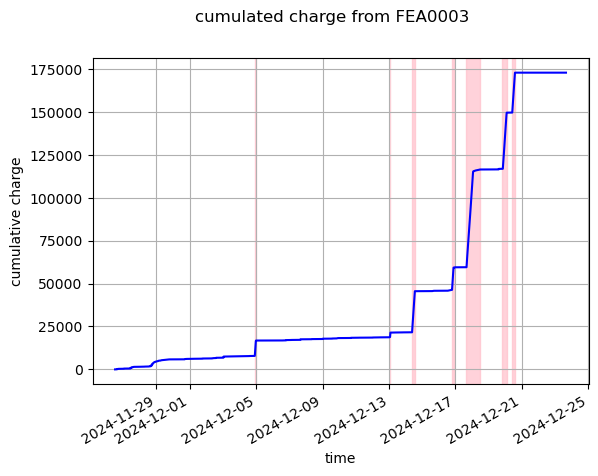

In [19]:
df = cum_df_F0003.copy()
print(cum_df_F0003)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax1.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax1.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax1.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts6 = '24/12/04-22:00:11'
te6 = '24/12/04-23:45:21'
ax1.axvspan(datetime.strptime(ts6, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te6, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax1.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()


#print(df_cut['timestamp'].loc[df_cut['cumulatedCharge'] == max(df_cut['cumulatedCharge'])])

#annot_max(df_cut)

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0003['timestamp']))

603608    568.0
Name: VSET, dtype: float64


<Figure size 1280x960 with 0 Axes>

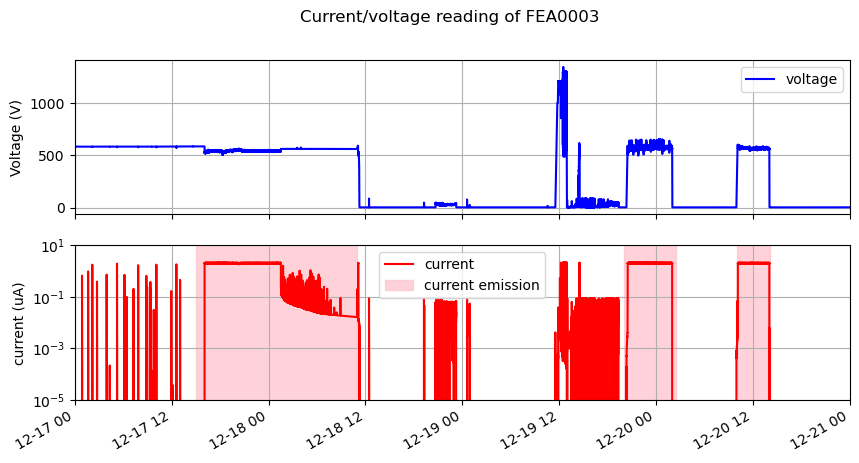

In [20]:
# plot of the entire run

from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'-',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

print(df.VSET.loc[df['timestamp'] == '24/12/14-09:10:11'])

# time period with current emission
ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax2.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(2000)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

plt.savefig(f"{dir_name}{FEA_name}_LXePlot_all", dpi=500)
plt.show()

603608    568.0
Name: VSET, dtype: float64


<Figure size 1280x960 with 0 Axes>

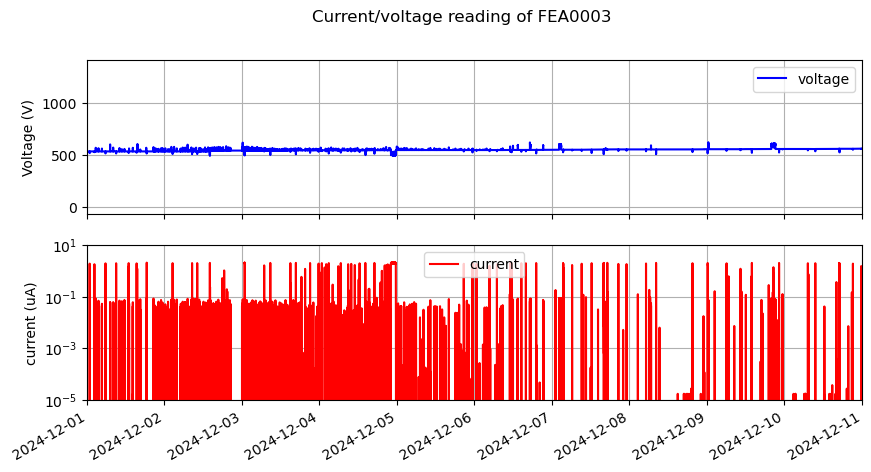

In [21]:
# plot of the entire run

from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'-',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

print(df.VSET.loc[df['timestamp'] == '24/12/14-09:10:11'])

# time period with current emission
ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax2.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,1), date(2024,12,11)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

plt.savefig(f"{dir_name}{FEA_name}_CVplot_Cpeak", dpi=500)
plt.show()

#### power plot

603608    568.0
Name: VSET, dtype: float64


<Figure size 1280x960 with 0 Axes>

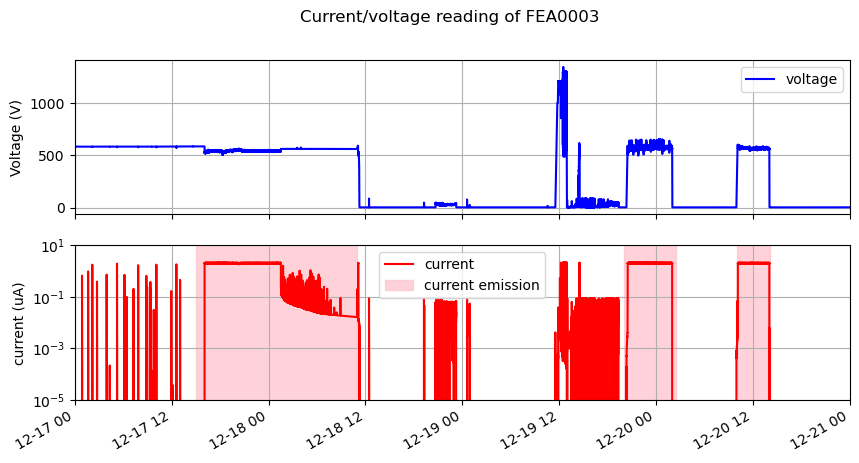

In [22]:
# plot of the entire run

from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'-',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

print(df.VSET.loc[df['timestamp'] == '24/12/14-09:10:11'])

# time period with current emission
ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax2.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(2000)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

plt.savefig(f"{FEA_name}_LXePlot_all", dpi=500)
plt.show()

603608    568.0
Name: VSET, dtype: float64


<Figure size 1280x960 with 0 Axes>

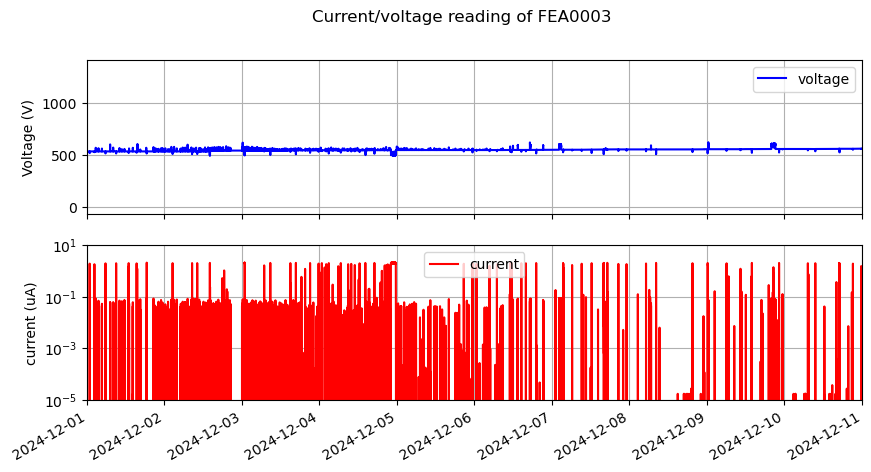

In [23]:
# plot of the entire run

from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'-',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

print(df.VSET.loc[df['timestamp'] == '24/12/14-09:10:11'])

# time period with current emission
ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/12/17-15:00:11'
te3 = '24/12/18-11:00:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/14-09:10:11'
te4 = '24/12/14-13:30:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts5 = '24/12/13-01:30:11'
te5 = '24/12/13-02:05:21'
ax2.axvspan(datetime.strptime(ts5, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te5, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts7 = '24/12/20-10:00:11'
te7 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts7, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te7, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,1), date(2024,12,11)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

plt.savefig("FEA0003_CVplot_Cpeak", dpi=500)
plt.show()

current used to baseline correction is -5.49945906961436e-08


<Figure size 1280x960 with 0 Axes>

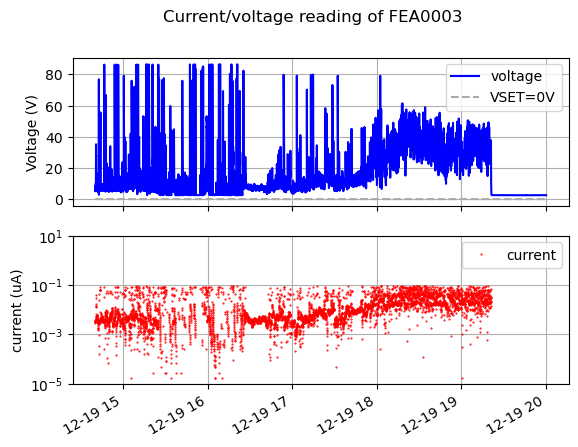

In [24]:
t_start = '24/12/19-14:40:11'
t_end = '24/12/19-20:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))


ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET={int(VSET)}V')
avg = mean(df.VMON.tolist()[1000:30000])
#ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim([480, 600])
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f"{dir_name}LXeRun_F0003_crosstalk_zoom", dpi=500)

0        -7.601695e-12
1        -3.360169e-11
2        -3.360169e-11
3        -3.360169e-11
4        -3.360169e-11
              ...     
927644   -4.052479e-10
927645   -4.052479e-10
927646   -4.052479e-10
927647   -4.052479e-10
927648   -4.317479e-10
Length: 927649, dtype: float64


<Figure size 1280x960 with 0 Axes>

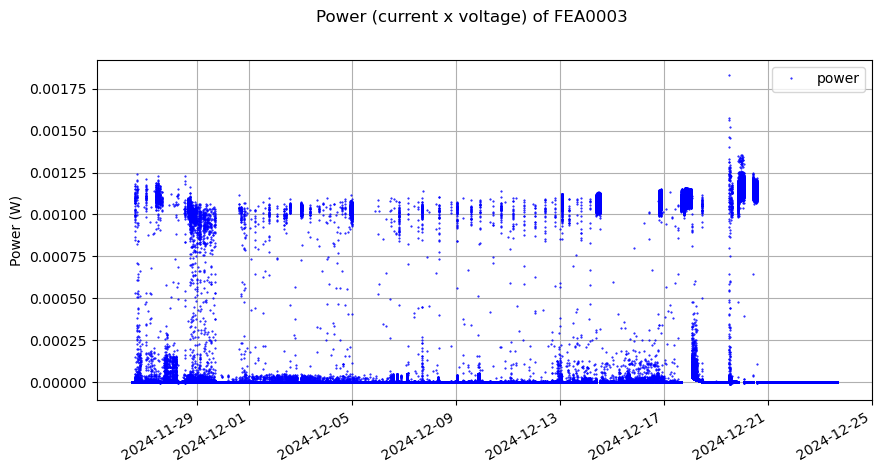

In [25]:
from datetime import date

df = df_F0003.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

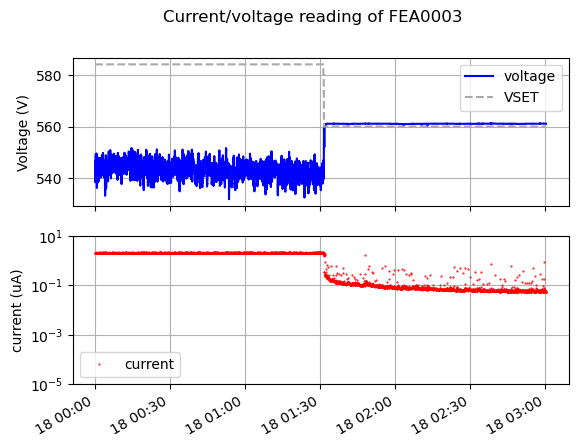

In [26]:
t_start = '24/12/18-00:00:11'
t_end = '24/12/18-03:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

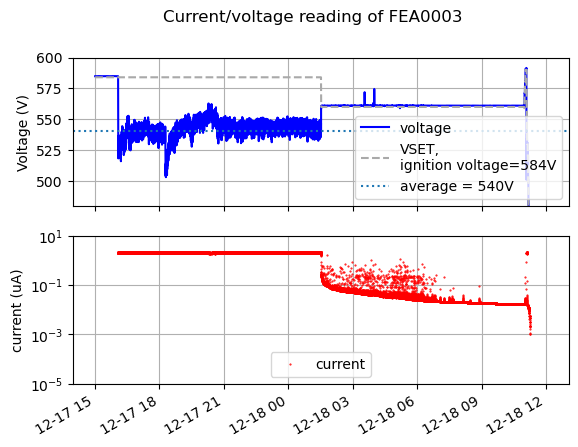

In [27]:
t_start = '24/12/17-15:00:11'
t_end = '24/12/18-12:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))


ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[len(df.VSET)/2]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage={int(VSET)}V')
avg = mean(df.VMON.tolist()[1000:30000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_ylim([480, 600])
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig("LXeRun_F0003_currentControl", dpi=500)

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

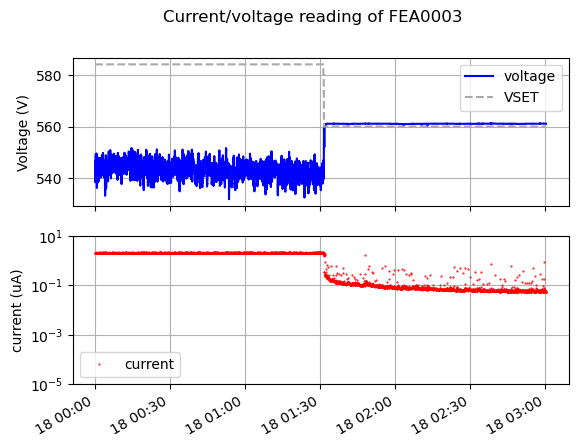

In [28]:
t_start = '24/12/18-00:00:11'
t_end = '24/12/18-03:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is 6.460420784142969e-23
              timestamp      IMON  VMON  caen  ch RUP RDW   VSET  ISET  \
0     24/12/19-20:00:13 -0.000233  2.55     1   3  no  no    0.0   2.1   
1     24/12/19-20:00:15 -0.000243  2.55     1   3  no  no    0.0   2.1   
2     24/12/19-20:00:18 -0.000233  2.55     1   3  no  no    0.0   2.1   
3     24/12/19-20:00:20 -0.000233  2.55     1   3  no  no    0.0   2.1   
4     24/12/19-20:00:23 -0.000233  2.55     1   3  no  no    0.0   2.1   
...                 ...       ...   ...   ...  ..  ..  ..    ...   ...   
9461  24/12/20-02:30:11 -0.000373  2.40     1   3  no  no  600.0   2.1   
9462  24/12/20-02:30:14 -0.000373  2.40     1   3  no  no  600.0   2.1   
9463  24/12/20-02:30:16 -0.000373  2.40     1   3  no  no  600.0   2.1   
9464  24/12/20-02:30:19 -0.000373  2.40     1   3  no  no  600.0   2.1   
9465  24/12/20-02:30:21 -0.000383  2.40     1   3  no  no  600.0   2.1   

          FEA  
0     FEA0003  
1     FEA0003  
2 

<Figure size 1280x960 with 0 Axes>

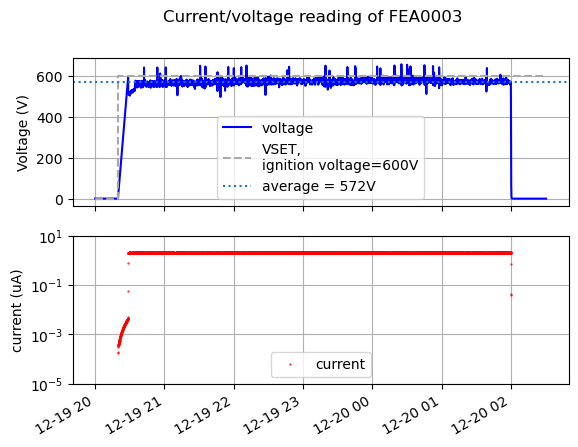

In [29]:
t_start = '24/12/19-20:00:11'
t_end = '24/12/20-02:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[len(df.VSET)/2]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage={int(VSET)}V')
avg = mean(df.VMON.tolist()[1000:8000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig('LXeRun_F0003_partial', dpi=500)

current used to baseline correction is 6.460420784142969e-23


<Figure size 1280x960 with 0 Axes>

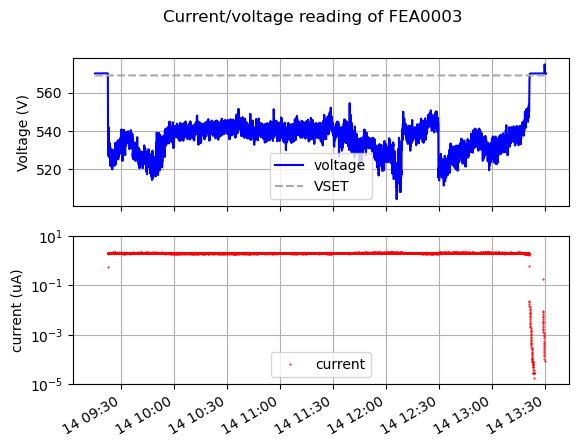

In [30]:
t_start = '24/12/14-09:15:11'
t_end = '24/12/14-13:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0003

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')
#ax1.axhline(mean(df.VMON), linestyle= ':', label = 'VMON avg')


fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig("FEA0003_CVplot_recovering", dpi=500)

#### charge plot

In [31]:
df = cum_df_F0004_neg.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/19-12:50:11'
te1 = '24/12/19-14:05:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
#ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name} negative emission')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0004_neg['timestamp']))

NameError: name 'cum_df_F0004_neg' is not defined

#### entire run

In [ ]:
# cuts

df = df_F0004_neg.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0004_neg = FEA_analysis.cumulated_charge(df)

cum_df_F0004_neg

#### power plot

In [ ]:
df = cum_df_F0004_neg.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/19-12:50:11'
te1 = '24/12/19-14:05:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-20:00:11'
te2 = '24/12/20-02:30:21'
#ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name} negative emission')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0004_neg['timestamp']))

#### partial plot (negative)

In [ ]:
# plot of the entire run
from datetime import date

df = df_F0004_neg.copy()

plt.figure()
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/19-12:50:11'
te1 = '24/12/19-14:05:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts2 = '24/12/05-09:35:11'
te2 = '24/12/19-16:18:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name} negative emission")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,23), date(2024,12,24)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
t_start = '24/12/19-12:40:11'
t_end = '24/12/19-14:05:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_neg = FEA_analysis.partial_charge(df_F0004_neg, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_neg.loc[new_df_F0004_neg['ch']==3, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_neg
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[400:1500])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA.iloc[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1.5, 2.5])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f"{dir_name}LXeRun_F0004neg_partial_linear", dpi=500)

In [ ]:
from datetime import date

df = df_F0004_neg.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

#### positive emission

In [ ]:
t_start = '24/12/19-12:40:11'
t_end = '24/12/19-14:05:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_neg = FEA_analysis.partial_charge(df_F0004_neg, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_neg.loc[new_df_F0004_neg['ch']==3, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_neg
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[400:1500])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA.iloc[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig("LXeRun_F0004neg_partial", dpi=500)

In [ ]:
t_start = '24/12/19-12:40:11'
t_end = '24/12/19-14:05:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_neg = FEA_analysis.partial_charge(df_F0004_neg, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_neg.loc[new_df_F0004_neg['ch']==3, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_neg
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[400:1500])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA.iloc[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
#ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1.5, 2.5])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig("LXeRun_F0004neg_partial_linear", dpi=500)

In [ ]:
t_start = '24/12/23-12:05:11'
t_end = '24/12/23-12:35:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_neg = FEA_analysis.partial_charge(df_F0004_neg, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_neg.loc[new_df_F0004_neg['ch']==3, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_neg

print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[200:400])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]} in electron emission")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig("LXeRun_F0004neg_discussion", dpi=500)

#### entire plot

In [ ]:
# cuts

df = df_F0004_pos.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0004_pos = FEA_analysis.cumulated_charge(df)

cum_df_F0004_pos

#### power plot

In [ ]:
df = cum_df_F0004_pos.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/20-13:50:11'
te1 = '24/12/21-13:20:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-14:38:11'
te2 = '24/12/19-16:25:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name} positive emission')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.legend()
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0004_pos['timestamp']))

#### partial plot (positive)

In [ ]:
# plot of the entire run
from datetime import date
df = df_F0004_pos.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/20-13:50:11'
te1 = '24/12/21-13:20:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-14:38:11'
te2 = '24/12/19-16:25:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name} positive emission")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])

ax1.set_xlim([date(2024,12,19), date(2024,12,22)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend(loc='lower right')

plt.gcf().autofmt_xdate()
plt.savefig(f"{FEA_name}_LXePlot_all", dpi=500)
plt.show()

In [ ]:

t_start = '24/12/20-13:40:11'
t_end = '24/12/21-13:20:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_pos = FEA_analysis.partial_charge(df_F0004_pos, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_pos.loc[new_df_F0004_pos['ch']==0, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_pos
#print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[len(df.VSET)/2]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[5000:30000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

plt.savefig(f'{dir_name}LXeRun_F0004pos_partial', dpi=500)

In [ ]:
from datetime import date

df = df_F0004_pos.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# cuts

df = df_F0005.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0005 = FEA_analysis.cumulated_charge(df)

cum_df_F0005

In [ ]:

t_start = '24/12/23-12:45:11'
t_end = '24/12/23-13:10:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_pos = FEA_analysis.partial_charge(df_F0004_pos, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_pos.loc[new_df_F0004_pos['ch']==0, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_pos
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[200:400])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]} in positive emission")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend() # loc='lower right'
ax2.legend() # loc='lower right'

plt.gcf().autofmt_xdate()
plt.savefig('LXeRun_F0004pos_discussion', dpi=500)

0.09933714152659034


<Figure size 1280x960 with 0 Axes>

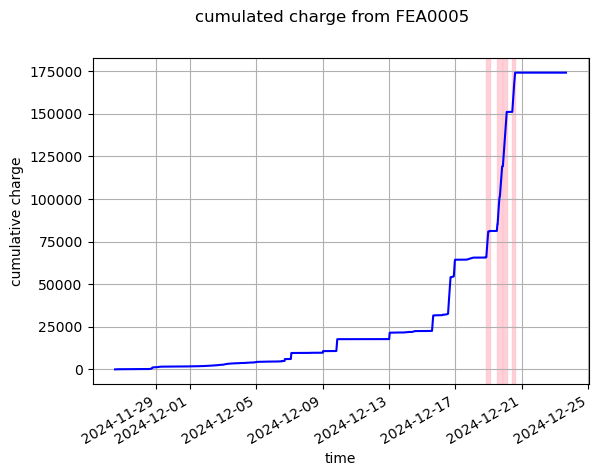

In [39]:

t_start = '24/12/20-13:40:11'
t_end = '24/12/21-13:20:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0004_pos = FEA_analysis.partial_charge(df_F0004_pos, t_start, t_end, t_start_base, t_end_base)
new_df_F0004_pos.loc[new_df_F0004_pos['ch']==0, 'FEA'] = FEA[1]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004_pos
#print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[len(df.VSET)/2]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[5000:30000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

plt.savefig('LXeRun_F0004pos_partial', dpi=500)

#### entire plot

In [ ]:
# plot of the entire run
from datetime import date
df = df_F0005

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/18-20:35:11'
te1 = '24/12/18-23:15:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:35:11'
te2 = '24/12/19-19:45:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/12/19-20:15:11'
te3 = '24/12/20-02:20:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/20-10:00:11'
te4 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')



fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f"{dir_name}{FEA_name}_LXePlot_all", dpi=500)
plt.show()

In [ ]:
# plot of the entire run
from datetime import date
df = df_F0005

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/18-20:35:11'
te1 = '24/12/18-23:15:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:35:11'
te2 = '24/12/19-19:45:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/12/19-20:15:11'
te3 = '24/12/20-02:20:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/20-10:00:11'
te4 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')



fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f"{dir_name}{FEA_name}_LXePlot_all", dpi=500)
plt.show()

In [ ]:
# cuts

df = df_F0005.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0005 = FEA_analysis.cumulated_charge(df)

cum_df_F0005

In [ ]:
from datetime import date

df = df_F0005.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
df = cum_df_F0005.copy()

x = df['IMON']
peaks, _ = find_peaks(x)
df_cut= df.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

x = df_cut['VMON']
peaks, _ = find_peaks(x)
df_cut = df_cut.drop(peaks)
df_cut = df_cut.reset_index(drop=True)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df_cut.FEA.iloc[0]

datetime_list = []
for d in df_cut.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df_cut['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/18-20:35:11'
te1 = '24/12/19-01:18:21'
ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:35:11'
te2 = '24/12/19-19:45:21'
ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/12/19-20:15:11'
te3 = '24/12/20-02:20:21'
ax1.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/20-10:00:11'
te4 = '24/12/20-14:10:21'
ax1.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df_cut['timestamp'])/len(df_F0005['timestamp']))

In [ ]:
t_start = '24/12/19-14:40:11'
t_end = '24/12/19-20:00:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==2, 'FEA'] = FEA[2]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)


VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[1000:4000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f'{dir_name}LXeRun_F0005_crosstalkSource', dpi=500)

current used to baseline correction is -3.714388748630377e-08
              timestamp      IMON    VMON  caen  ch RUP RDW   VSET  ISET  \
0     24/12/18-20:35:12 -0.000499  800.20     1   2  no  no  800.0   2.1   
1     24/12/18-20:35:14 -0.000499  800.20     1   2  no  no  800.0   2.1   
2     24/12/18-20:35:17 -0.000489  800.20     1   2  no  no  800.0   2.1   
3     24/12/18-20:35:19 -0.000499  800.20     1   2  no  no  800.0   2.1   
4     24/12/18-20:35:21 -0.000509  800.20     1   2  no  no  800.0   2.1   
...                 ...       ...     ...   ...  ..  ..  ..    ...   ...   
4250  24/12/18-23:30:12 -0.000509  810.15     1   2  no  no  810.0   2.1   
4251  24/12/18-23:30:14 -0.000509  810.15     1   2  no  no  810.0   2.1   
4252  24/12/18-23:30:17 -0.000499  810.15     1   2  no  no  810.0   2.1   
4253  24/12/18-23:30:19 -0.000509  810.15     1   2  no  no  810.0   2.1   
4254  24/12/18-23:30:22 -0.000509  810.15     1   2  no  no  810.0   2.1   

          FEA  
0     FEA

<Figure size 1280x960 with 0 Axes>

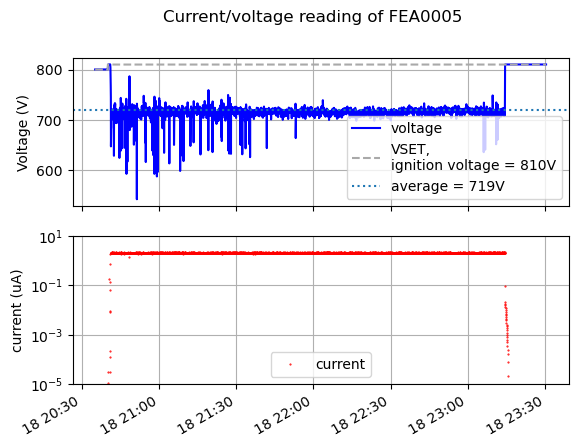

In [ ]:
# plot of the entire run
from datetime import date
df = df_F0005

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/18-20:35:11'
te1 = '24/12/18-23:15:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:35:11'
te2 = '24/12/19-19:45:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/12/19-20:15:11'
te3 = '24/12/20-02:20:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts4 = '24/12/20-10:00:11'
te4 = '24/12/20-14:10:21'
ax2.axvspan(datetime.strptime(ts4, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te4, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')



fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f"{FEA_name}_LXePlot_all", dpi=500)
plt.show()

In [ ]:
from datetime import date

df = df_F0005.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
from datetime import date

df = df_F0005.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Power (current x voltage) of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
df = df_F0007.copy()

x = -df['VMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x,threshold=[0.5,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
t_start = '24/12/18-20:35:11'
t_end = '24/12/18-23:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==2, 'FEA'] = FEA[2]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005
print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)


VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[1000:4000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig('LXeRun_F0005_partial', dpi=500)

In [ ]:
t_start = '24/12/19-20:15:11'
t_end = '24/12/20-02:20:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==2, 'FEA'] = FEA[2]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)} V')
avg = mean(df.VMON.tolist()[1000:4000])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)} V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()


plt.gcf().autofmt_xdate()

plt.savefig('F0005_forDiscussion', dpi=500)

0.0


<Figure size 640x480 with 0 Axes>

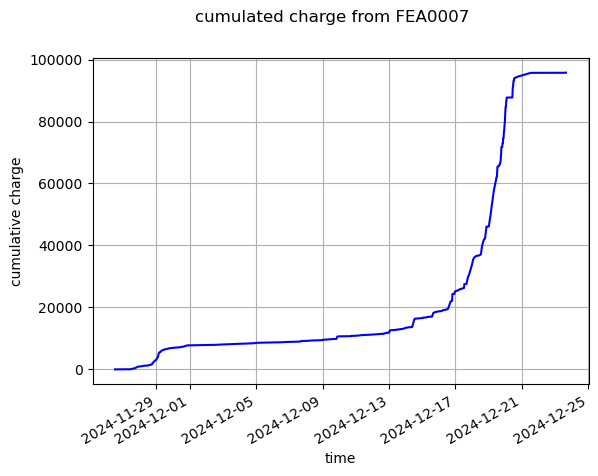

In [47]:
df = df_VMON_cutOnly.copy()

plt.figure(dpi=100)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0007['timestamp']))

In [ ]:
df = df_F0007.copy()

x = df['IMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x, threshold=[2,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
df = df_F0007.copy()

x = df['IMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x, threshold=[2,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
df = df_F0007.copy()

x = -df['VMON']

datetime_list = []
datetime_list_peaks = []

peaks, _ = find_peaks(x,threshold=[0.5,None])

for d in df.timestamp:
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

for d in df.timestamp.loc[peaks]:
    datetime_list_peaks.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

print(len(x[peaks])/len(x))


fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(20, 5))

ax1.plot(datetime_list,x)
ax2.plot(datetime_list_peaks, x.loc[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
#ax2.set_yscale('log')

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
# cuts

df = df_F0007.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

df_VMON_cutOnly = df.copy()

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[2,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = -df['VMON']
peaks, _ = find_peaks(x,threshold=[0.5,None])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0007 = FEA_analysis.cumulated_charge(df)

cum_df_F0007

In [ ]:
from datetime import date

df = df_F0007.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

power = df.VMON * df.IMON * 1e-6
print(power)

ax1.plot(datetime_list, power,'.',color='blue',  label= 'power', markersize=1)

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Power (W)')
#ax1.set_yscale('log')
#ax1.set_ylim(300)
#ax1.set_xlim([date(2024,11,26), date(2024,12,21)])

ax1.grid()
ax1.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [ ]:
df = df_VMON_cutOnly.copy()

plt.figure(dpi=100)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax1.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0007['timestamp']))

In [ ]:
t_start = '24/12/19-11:55:11'
t_end = '24/12/19-12:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0007 = FEA_analysis.partial_charge(df_F0007, t_start, t_end, t_start_base, t_end_base)
new_df_F0007.loc[new_df_F0007['ch']==2, 'FEA'] = FEA[3]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0007

print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET,\nignition voltage = {int(VSET)}V')
avg = mean(df.VMON.tolist()[100:600])
ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f'{dir_name}LXeRun_F0007_partial', dpi=500)

In [ ]:
# plot of the entire run
from datetime import date

df = df_F0007.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)
#ax1.plot(datetime_list, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

# time period with current emission
ts1 = '24/12/19-14:40:11'
te1 = '24/12/19-15:15:21'
#ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts2 = '24/12/19-11:55:11'
te2 = '24/12/19-12:30:21'
#ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
#ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.set_xlim([date(2024,12,17), date(2024,12,21)])

ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f"{FEA_name}_LXePlot_all", dpi=500)
plt.show()

In [ ]:
t_start = '24/12/20-09:40:11'
t_end = '24/12/20-13:30:21'

t_start_base = '24/11/26-12:30:01'
t_end_base = '24/11/26-12:40:00'

new_df_F0007 = FEA_analysis.partial_charge(df_F0007, t_start, t_end, t_start_base, t_end_base)
new_df_F0007.loc[new_df_F0007['ch']==2, 'FEA'] = FEA[3]

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0007

#print(df)

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'-',color='red', label='current', markersize=1)

VSET = df.VSET.loc[round(len(df.VSET)/2)]
#ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label=f'VSET = {int(VSET)}V')
#avg = mean(df.VMON.tolist()[100:600])
#ax1.axhline(avg, linestyle= ':', label = f'average = {round(avg)}V')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.savefig(f'{dir_name}LXeRun_F0007_attemptsToStabilize', dpi=500)